In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json 
#Diversity in Filmmaking:
#How has gender representation in lead roles evolved across decades?
#Which decade had the highest representation of female directors and lead actors, and how did this correlate with film ratings and critical acclaim?

In [2]:
# Read the CSV file
merged_df = pd.read_csv("merged_df.csv")
#Display Columns
merged_df.columns

Index(['imdb_id', 'original_language', 'overview', 'release_date', 'runtime',
       'title', 'cast', 'crew', 'Year', 'Rated', 'Genre', 'Director', 'Writer',
       'Actors', 'Language', 'Country', 'Awards', 'Poster', 'imdbRating',
       'imdbVotes', 'Type', 'BoxOffice', 'Total Awards'],
      dtype='object')

In [3]:
#print df length
print(f"df Length: {len(merged_df)}")

# Print number of nulls > 0
print("Number of nulls")
print(merged_df.isnull().sum()[merged_df.isnull().sum() > 0])

df Length: 6419
Number of nulls
overview      1
cast         20
crew          6
Writer       69
Language      2
Awards      942
dtype: int64


In [4]:
#Columns omitted: 'imdb_id', 'original_language', 'overview', 'Writer', 
# 'Actors', 'Language', 'Country', 'Poster', 'Type', 'Director'

refined_df = merged_df[[
    'title','Year','release_date','runtime','Rated','Genre',
    'BoxOffice','Awards','Total Awards','imdbRating','imdbVotes',
    'cast','crew'
]]

# Remove rows with null values
refined_df = refined_df.dropna()

#remove rows with year > 2017
refined_df = refined_df[refined_df["Year"] < 2018]

#print df length
print(f"df Length: {len(refined_df)}")

refined_df.head()



df Length: 5457


,title,Year,release_date,runtime,Rated,Genre,BoxOffice,Awards,Total Awards,imdbRating,imdbVotes,cast,crew
0,Toy Story,1995,1995-10-30,81.0,G,"Animation, Adventure, Comedy",223225679.0,Nominated for 3 Oscars. 29 wins & 24 nominatio...,56,8.3,1084764.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,Jumanji,1995,1995-12-15,104.0,PG,"Adventure, Comedy, Family",100499940.0,4 wins & 11 nominations,15,7.1,382657.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,Grumpier Old Men,1995,1995-12-22,101.0,PG-13,"Comedy, Romance",71518503.0,2 wins & 2 nominations,4,6.7,30011.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,Waiting to Exhale,1995,1995-12-22,127.0,R,"Comedy, Drama, Romance",67052156.0,9 wins & 10 nominations,19,6.0,12462.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,Father of the Bride Part II,1995,1995-02-10,106.0,PG,"Comedy, Family, Romance",76594107.0,1 win & 2 nominations,3,6.1,42152.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [5]:
#Gender:
#0: Unknown
#1: Female
#2: Male

# Function to count male and female characters
def count_genders(cast_data_str):
    cast_data = eval(cast_data_str)  # Convert string to list of dictionaries using eval
    male_count = sum(1 for member in cast_data if member['gender'] == 2)  # Count males
    female_count = sum(1 for member in cast_data if member['gender'] == 1)  # Count females
    return pd.Series([male_count, female_count])

# Apply the function to the "cast" column & add new columns
refined_df[['cast_males', 'cast_females']] = refined_df['cast'].apply(count_genders)

# Apply the function to the "crew" column & add new columns
refined_df[['crew_males', 'crew_females']] = refined_df['crew'].apply(count_genders)

# Calculate percent female cast and crew
refined_df['percent_female_cast'] = (refined_df['cast_females'] / (refined_df['cast_males'] + refined_df['cast_females'])) * 100
refined_df['percent_female_crew'] = (refined_df['crew_females'] / (refined_df['crew_males'] + refined_df['crew_females'])) * 100

# Remove cast and crew columns - no longer needed
refined_df.drop(columns=['cast', 'crew'], inplace=True)


print("Dataframe size", len(refined_df))


#decade dataframes
refined_df_80s = refined_df[(refined_df["Year"] >= 1980) & (refined_df["Year"] < 1990)]
refined_df_90s = refined_df[(refined_df["Year"] >= 1990) & (refined_df["Year"] < 2000)]
refined_df_2000s = refined_df[(refined_df["Year"] >= 2000) & (refined_df["Year"] < 2010)]
refined_df_2010s = refined_df[(refined_df["Year"] >= 2010) & (refined_df["Year"] < 2018)]



#lengths of decades
print("80s:", len(refined_df_80s))
print("90s:", len(refined_df_90s))
print("2000s:", len(refined_df_2000s))
print("2010s:", len(refined_df_2010s))


refined_df.head(3)


Dataframe size 5457
80s: 969
90s: 1397
2000s: 1751
2010s: 1340


,title,Year,release_date,runtime,Rated,Genre,BoxOffice,Awards,Total Awards,imdbRating,imdbVotes,cast_males,cast_females,crew_males,crew_females,percent_female_cast,percent_female_crew
0,Toy Story,1995,1995-10-30,81.0,G,"Animation, Adventure, Comedy",223225679.0,Nominated for 3 Oscars. 29 wins & 24 nominatio...,56,8.3,1084764.0,9,3,29,4,25.000000,12.121212
1,Jumanji,1995,1995-12-15,104.0,PG,"Adventure, Comedy, Family",100499940.0,4 wins & 11 nominations,15,7.1,382657.0,9,6,14,0,40.000000,0.000000
2,Grumpier Old Men,1995,1995-12-22,101.0,PG-13,"Comedy, Romance",71518503.0,2 wins & 2 nominations,4,6.7,30011.0,4,3,4,0,42.857143,0.000000


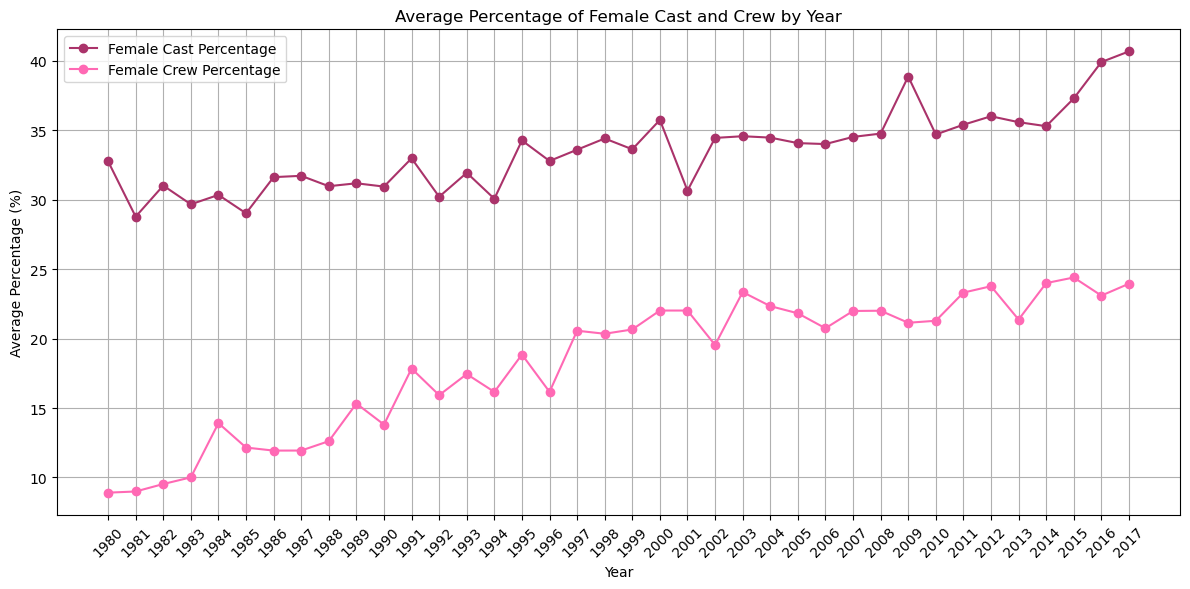

In [6]:
#Start Visualizing





# Group by Year and calculate the mean percent_female_cast and percent_female_crew
grouped_df = refined_df.groupby('Year').agg({
    'BoxOffice': 'max',  # Sum of BoxOffice for each year
    'percent_female_cast': 'mean',  # Average percentage of female cast
    'percent_female_crew': 'mean'   # Average percentage of female crew
})
grouped_df

# Assuming grouped_df is already defined as per your code
plt.figure(figsize=(12, 6))

# Plotting the lines
plt.plot(grouped_df.index, grouped_df['percent_female_cast'], label='Female Cast Percentage', color='#AA336A', marker='o')
plt.plot(grouped_df.index, grouped_df['percent_female_crew'], label='Female Crew Percentage', color='hotpink', marker='o')

# Adding titles and labels
plt.title('Average Percentage of Female Cast and Crew by Year')
plt.xlabel('Year')
plt.ylabel('Average Percentage (%)')
plt.xticks(grouped_df.index, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for better visibility

# Show plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [7]:
def plot_gender(df,ax2_column,ax2_ylabel,title,in_millions=False):
    # Group by Year and calculate the required metrics
    grouped_df = df.groupby('Year').agg({
        ax2_column: 'mean',
        'percent_female_cast': 'mean',
        'percent_female_crew': 'mean'
    })

    
    # Create a figure and plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(grouped_df.index, grouped_df['percent_female_cast'], color='#AA336A', label='Female Cast %', marker='o')
    ax1.plot(grouped_df.index, grouped_df['percent_female_crew'], color='hotpink', label='Female Crew %', marker='o')
    ax1.set_ylabel('Percentage of Women (%)')
    ax1.grid()

    # Create a second y-axis
    ax2 = ax1.twinx()
    if(in_millions == True):
        grouped_df[ax2_column+'_millions'] = grouped_df[ax2_column] / 1_000_000
        ax2.bar(grouped_df.index, grouped_df[ax2_column+'_millions'], color='lightblue', alpha=0.4, label=ax2_ylabel)
    else:
        ax2.bar(grouped_df.index, grouped_df[ax2_column], color='lightblue', alpha=0.4, label=ax2_ylabel)
   
    ax2.set_ylabel(ax2_ylabel)

    # Set title and show legend
    plt.title(title)
    fig.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

    # Show plot
    plt.tight_layout()
    plt.show()


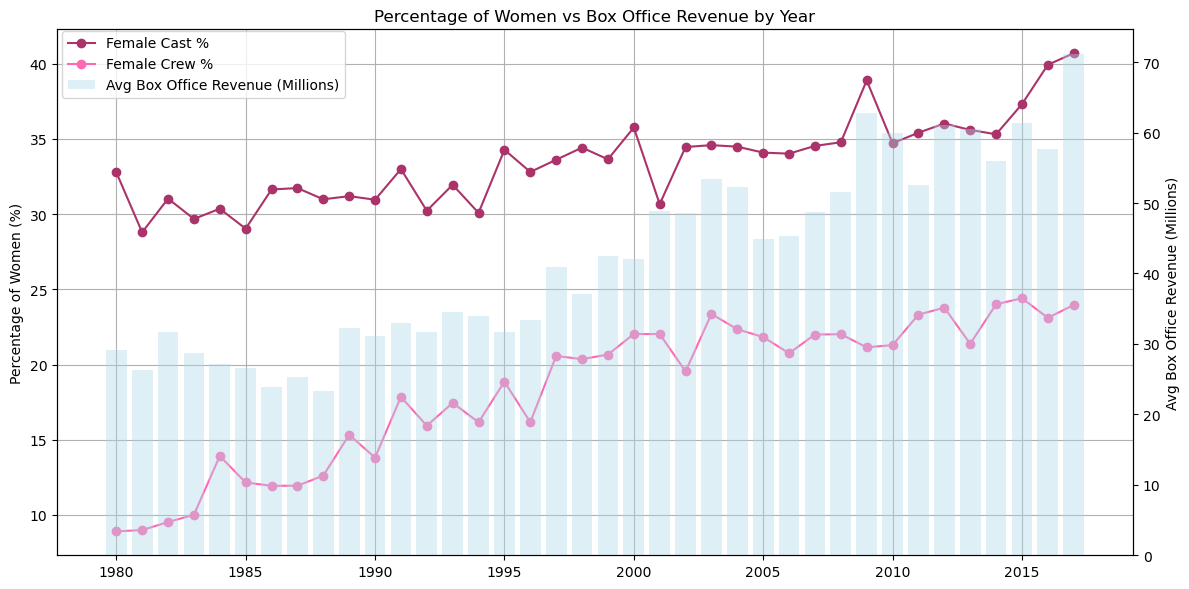

In [8]:
plot_gender(refined_df,'BoxOffice','Avg Box Office Revenue (Millions)','Percentage of Women vs Box Office Revenue by Year',in_millions = True)

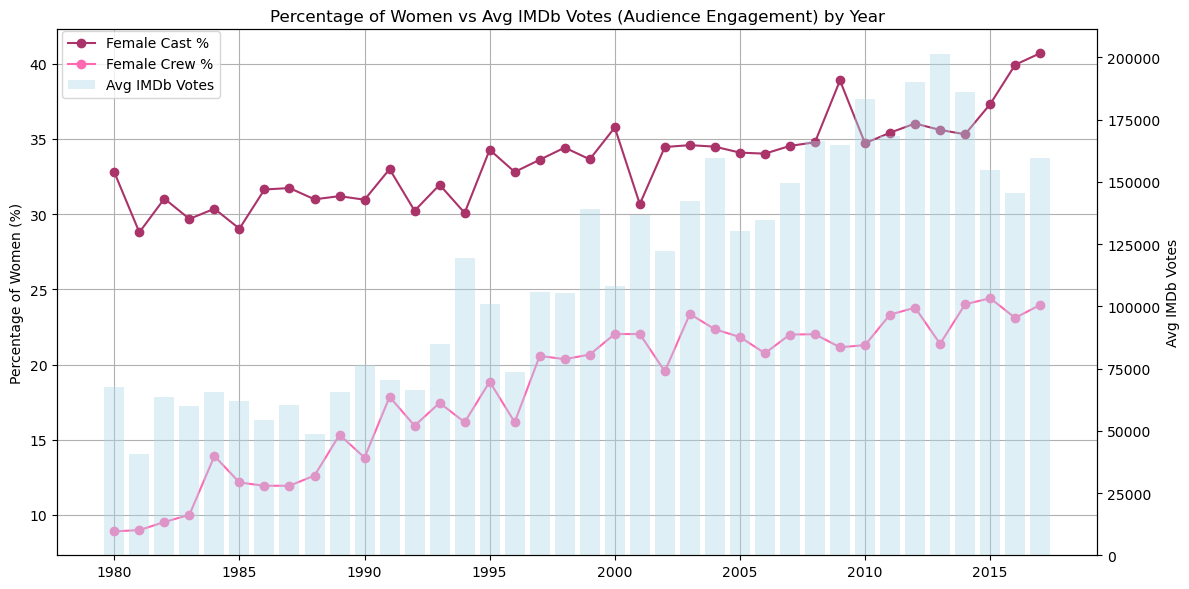

In [9]:
plot_gender(refined_df,'imdbVotes','Avg IMDb Votes','Percentage of Women vs Avg IMDb Votes (Audience Engagement) by Year')

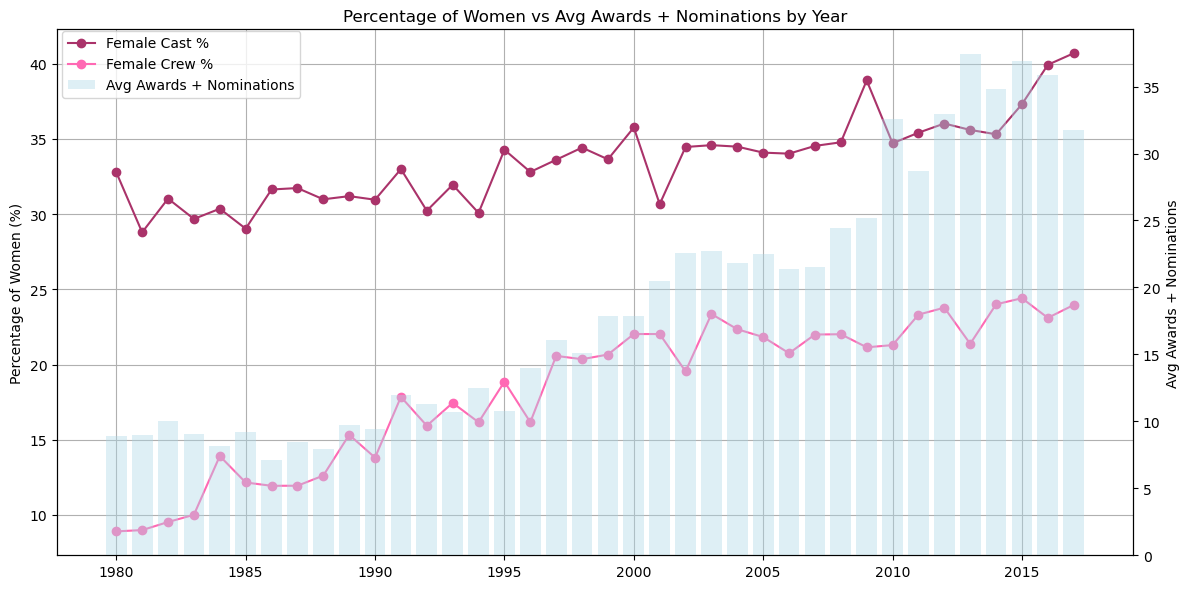

In [10]:
plot_gender(refined_df,'Total Awards','Avg Awards + Nominations','Percentage of Women vs Avg Awards + Nominations by Year')